In [1]:
# pip3 install matplotlib
# pip3 install opencv-python

from os import path
image_dir = "1108/00ac028483bc6cab330a4e070cd2b2fb34e8e87e_65/"
bg_path = path.join(image_dir, "bg.jpg")
cut_path = path.join(image_dir, 'cut.jpg')

import cv2
import numpy as np
import matplotlib.pyplot as plt
from os import path
import os
import random


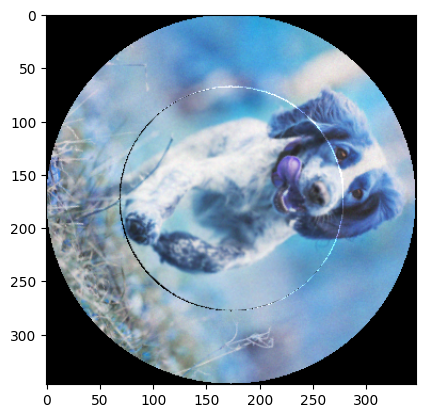

In [7]:
bg = cv2.imread(bg_path, cv2.IMREAD_COLOR)
cut = cv2.imread(cut_path, cv2.IMREAD_COLOR)

def show_img(img):
    plt.imshow(img)
    plt.show()

def rotate_and_combine_img(angle):
    # 旋转角度
    M = cv2.getRotationMatrix2D((cut.shape[1]/2, cut.shape[0]/2), angle, 1)
    cut_o = cv2.warpAffine(cut, M, (cut.shape[1], cut.shape[0]))
    #cut_o = cv2.resize(cut_o, (cut_o.shape[1], cut_o.shape[0]))
    
    # 扩展小图片画布
    cut_new = np.zeros(bg.shape, np.uint8)
    center = (int(cut_new.shape[1]/2), int(cut_new.shape[0]/2))
    x = center[0] - int(cut_o.shape[1]/2)
    y = center[1] - int(cut_o.shape[0]/2)
    cut_new[y-1:y-1+cut_o.shape[0], x:x+cut_o.shape[1]] = cut_o
    
    bg_h, bg_w = bg.shape[:2]
    cut_h, cut_w = cut_o.shape[:2]
    bg_center = (int(bg_w/2), int(bg_h/2))
    
    # 制作掩盖层
    mask = np.zeros((bg_h, bg_w), dtype=np.uint8)
    cv2.circle(mask, bg_center, cut_h//2+2, (255, 255, 255), -1)
    mask2 = np.zeros((bg_h, bg_w), dtype=np.uint8)
    cv2.circle(mask2, bg_center, bg_h//2//2, (255, 255, 255), -1)
    
    # 掩盖小图片的外圈
    cut_fg = cv2.bitwise_and(cut_new, cut_new, mask=mask)
    # 掩盖大图片的中心圈
    bg_bg = cv2.bitwise_and(bg, bg, mask=cv2.bitwise_not(mask2))

    new_image = cv2.add(cut_fg, bg_bg)
    #new_image = cv2.add(new_image, cut_fg)
    #new_image = cv2.add(new_image, cut_bg)
    return new_image
        
rotated_img = rotate_and_combine_img(-130)
show_img(rotated_img)

def rotate_img(img, angle):
    M = cv2.getRotationMatrix2D((img.shape[1]/2, img.shape[0]/2), angle, 1)
    return cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

def rotate_save(src, dest, base_angle):
    os.makedirs(dest, exist_ok=True)
    bg = cv2.imread(path.join(src, "bg.jpg"), cv2.IMREAD_ANYCOLOR)
    cut = cv2.imread(path.join(src, "cut.jpg"), cv2.IMREAD_ANYCOLOR)
    cut_new = np.zeros(bg.shape, np.uint8)
    center = (int(cut_new.shape[1]/2), int(cut_new.shape[0]/2))
    x = center[0] - int(cut.shape[1]/2)
    y = center[1] - int(cut.shape[0]/2)
    cut_new[y:y+cut.shape[0], x-1:x+cut.shape[1]-1] = cut
    
    angle_bg = random.randrange(0, 36000) / 100
    angle_cut = random.randrange(0, 36000) / 100
    rotated_bg = rotate_img(bg, base_angle + angle_bg)
    rotated_cut = rotate_img(cut_new, angle_cut)
    #rotated = cv2.Canny(rotated, 50, 100)
    cv2.imwrite(path.join(dest, "bg.jpg"), rotated_bg)
    cv2.imwrite(path.join(dest, "cut.jpg"), rotated_cut)
    with open(path.join(dest, "angle.txt"), "w") as f:
        f.write("%f" % -(angle_bg - angle_cut))
        
def generate_testcases(src, base, dest, cases):
    for i in range(0, cases):
        rotate_save(src, path.join(dest, "%06d" % i), base)
        
# generate_testcases(
#     "1108/f24144eb9039fa7b197d92762ee9d945c5ed1df4_73",
#     259,
#     "/tmp/test",
#     3000,
# )
    

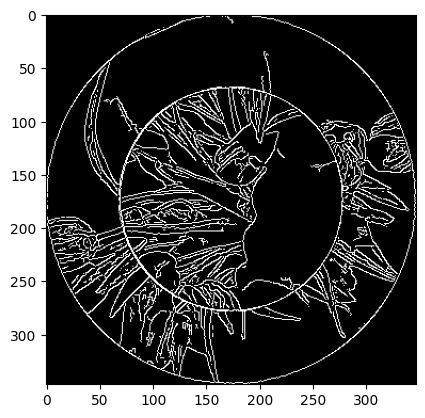

In [2]:
import cv2
import numpy as np
import random
import time

random.seed(time.time())

bg = cv2.imread(bg_path, cv2.IMREAD_COLOR)
cut = cv2.imread(cut_path, cv2.IMREAD_COLOR)

def show_angle(angle):
    # 旋转角度
    M = cv2.getRotationMatrix2D((cut.shape[1]/2, cut.shape[0]/2), angle, 1)
    cut_o = cv2.warpAffine(cut, M, (cut.shape[1], cut.shape[0]))
    # 扩展小图片画布
    cut_new = np.zeros(bg.shape, np.uint8)
    center = (int(cut_new.shape[1]/2), int(cut_new.shape[0]/2))
    x = center[0] - int(cut.shape[1]/2)
    y = center[1] - int(cut.shape[0]/2)
    cut_new[y:y+cut.shape[0], x:x+cut.shape[1]] = cut_o
    
    bg_h, bg_w = bg.shape[:2]
    cut_h, cut_w = cut_o.shape[:2]
    bg_center = (int(bg_w/2), int(bg_h/2))
    
    # 制作掩盖层
    mask = np.zeros((bg_h, bg_w), dtype=np.uint8)
    cv2.circle(mask, bg_center, cut_h//2, (255, 255, 255), -1)
    
    # 掩盖小图片的外圈
    cut_fg = cv2.bitwise_and(cut_new, cut_new, mask=mask)
    # 掩盖大图片的中心圈
    bg_bg = cv2.bitwise_and(bg, bg, mask=cv2.bitwise_not(mask))
    cut_fg = cv2.Canny(cut_fg, t1, t2)
    bg_bg = cv2.Canny(bg_bg, t1, t2)

    new_image = cv2.add(cut_fg, bg_bg)
    #new_image = cv2.add(new_image, cut_fg)
    #new_image = cv2.add(new_image, cut_bg)

    plt.imshow(new_image, cmap = plt.cm.gray)
    plt.show()
    
t1 = 50
t2 = 100

show_angle(281)


-125.2726177503132


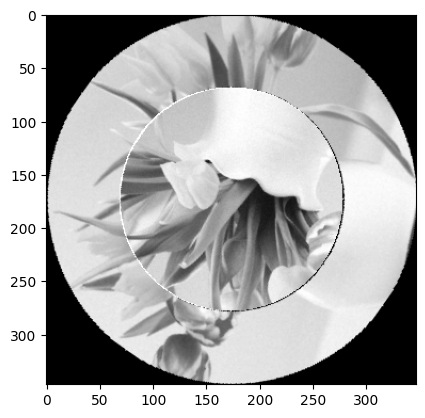

In [3]:
import cv2
import numpy as np

bg = cv2.imread(bg_path, cv2.IMREAD_GRAYSCALE)
cut = cv2.imread(cut_path, cv2.IMREAD_GRAYSCALE)

def show_img(img):
    plt.imshow(img, cmap = plt.cm.gray)
    plt.show()

def expand_to(cut, bg):
    cut_new = np.zeros(bg.shape, np.uint8)
    center = (int(cut_new.shape[1]/2), int(cut_new.shape[0]/2))
    x = center[0] - int(cut.shape[1]/2)
    y = center[1] - int(cut.shape[0]/2)
    cut_new[y:y+cut.shape[0], x:x+cut.shape[1]] = cut
    return cut_new


cut = expand_to(cut, bg)

sift = cv2.SIFT_create()

# 检测关键点和描述符
kp1, des1 = sift.detectAndCompute(bg, None)
kp2, des2 = sift.detectAndCompute(cut, None)

# 创建 BFMatcher
bf = cv2.BFMatcher()

# 使用 BFMatcher 进行特征匹配
matches = bf.match(des1, des2)

# 对匹配结果进行排序
matches = sorted(matches, key=lambda x:x.distance)

# 取前10个匹配结果
matches = matches[:10]

# 提取匹配关键点的坐标
pts1 = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
pts2 = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# 计算变换矩阵
M, mask = cv2.findHomography(pts2, pts1, cv2.RANSAC, 5.0)

# 计算旋转角度
angle = np.arctan2(M[1, 0], M[0, 0]) * 180 / np.pi

print(angle)

def combine(bg, cut):
    M = cv2.getRotationMatrix2D((bg.shape[1]/2, bg.shape[0]/2), angle, 1)
    bg = cv2.warpAffine(bg, M, (bg.shape[1], bg.shape[0]))

    bg_h, bg_w = bg.shape[:2]
    bg_center = (int(bg_w/2), int(bg_h/2))
    cut_h, cut_w = cut.shape[:2]

    mask = np.zeros((bg_h, bg_w), dtype=np.uint8)
    cv2.circle(mask, bg_center, cut_h//2+2, (255, 255, 255), -1)
    
    # 掩盖小图片的外圈
    cut_fg = cv2.bitwise_and(cut, cut, mask=mask)
    # 掩盖大图片的中心圈
    # bg_bg = cv2.bitwise_and(bg, bg, mask=cv2.bitwise_not(mask2))

    return cv2.add(bg, cut_fg)

show_img(combine(bg, cut))


# cnt1 = contours1[0]
# cnt2 = contours2[0]

# ret12 = cv2.matchShapes(cnt1, cnt2, 1, 0.0)

# print("Matching Image 1 with Image 2:", ret12)


# def showMatchScore(bg, cut, angle):
#     M = cv2.getRotationMatrix2D((bg.shape[1]/2, bg.shape[0]/2), angle, 1)
#     bg = cv2.warpAffine(bg, M, (bg.shape[1], bg.shape[0]))
#     ret, thresh1 = cv2.threshold(cut, 150, 255, 0)
#     ret, thresh2 = cv2.threshold(bg, 150, 255, 0)
#     contours1, _ = cv2.findContours(
#         thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#     contours2, _ = cv2.findContours(
#         thresh2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#     cnt1 = contours1[0]
#     cnt2 = contours2[0]

#     ret12 = cv2.matchShapes(cnt1, cnt2, 1, 0.0)
#     print(ret12)
